In [ ]:
import torch
from huri.learning.network.d3qn_attention import DuelingDQN
from huri.learning.utils import select_device, LOGGER
import numpy as np
from huri.learning.env.arrangement_planning_rack_gc_apex.env import RackArrangementEnv, RackStatePlot

num_tube_classes = 2
rack_size = (3, 5)
action_space_dim = np.prod(rack_size) ** 2
observation_space_dim = (1, rack_size[0], rack_size[1])
observation_space_dim_nn = (1, *rack_size)
env = RackArrangementEnv(rack_size=rack_size,
                         num_classes=num_tube_classes,
                         observation_space_dim=observation_space_dim,
                         action_space_dim=action_space_dim,
                         is_curriculum_lr=True,
                         is_goalpattern_fixed=True,
                         difficulty=1, )
action_vec = np.zeros(action_space_dim, dtype=np.float32)
#
device = select_device()

net = DuelingDQN(obs_dim=observation_space_dim, action_dim=action_space_dim).to(device)

net.load_state_dict(torch.load("transfer_learning_weight.pt"))
net.eval()

In [ ]:
import huri.core.file_sys as fs

dataset = fs.load_pickle("dataset_3_5.pkl")

In [ ]:
def imshow(img):
    import cv2
    import IPython
    _, ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

def to_tensor(nparray:np.ndarray, device):
    return torch.tensor(nparray,device=device, dtype=torch.float32)

ground truth value is  49.5
pred value is  tensor([[50.12826]], device='cuda:0', grad_fn=<AddmmBackward0>)


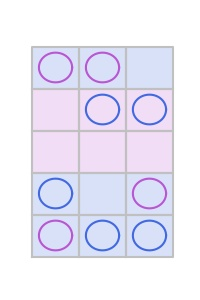

In [109]:
rid = np.random.randint(len(dataset))
state, goal, value = dataset[rid]
value = value.max()
drawer = RackStatePlot(goal)
img = drawer.plot_states([state]).get_img()


pred = net.forward_value(to_tensor(state, device=device).unsqueeze(0),
                  to_tensor(goal, device=device).unsqueeze(0))
print("ground truth value is ", value)
print("pred value is ", pred)
imshow(img)

In [29]:
to_tensor(state, device=device).unsqueeze(0)

tensor([[[0., 0., 0., 1., 2.],
         [1., 2., 2., 2., 2.],
         [1., 1., 0., 0., 0.]]], device='cuda:0')